In [13]:
import numpy as np
import pandas as pd

In [14]:
import os
for dirname, _, filenames in os.walk('sensor.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [17]:
from sklearn.cluster import KMeans

# Data Cleaning

In [19]:
df = pd.read_csv('sensor.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [20]:
#sensor 15 is use less
#we have to do something for timestamp data type

In [21]:
del df['sensor_15']

In [22]:
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_16 

In [24]:
#one more unnecessary column
del df['Unnamed: 0']

In [25]:
df.nunique() 
#many repeating value here

timestamp         220320
sensor_00           1253
sensor_01            831
sensor_02            831
sensor_03            588
sensor_04           7844
sensor_05         190751
sensor_06            812
sensor_07            531
sensor_08            626
sensor_09            565
sensor_10         198804
sensor_11         196368
sensor_12         187145
sensor_13         191983
sensor_14          94564
sensor_16         110522
sensor_17         148000
sensor_18         152603
sensor_19         100422
sensor_20          92129
sensor_21         131083
sensor_22         126401
sensor_23         119286
sensor_24         133778
sensor_25         165999
sensor_26         179718
sensor_27         203198
sensor_28         189278
sensor_29         201908
sensor_30           2070
sensor_31           2685
sensor_32         205414
sensor_33         200855
sensor_34         203895
sensor_35         201781
sensor_36         201437
sensor_37         188898
sensor_38            602
sensor_39            909


In [26]:
df.shape

(220320, 53)

In [27]:
df = df.drop_duplicates()
df.shape

(220320, 53)

In [28]:
def calc_percent_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent']) 
    idx = nans['percent'] > 0
    return nans[idx]

calc_percent_NAs(df).head(10)

,percent
sensor_50,0.349569
sensor_51,0.069821
sensor_00,0.046333
sensor_07,0.024741
sensor_08,0.023180
sensor_06,0.021777
sensor_09,0.020856
sensor_01,0.001675
sensor_30,0.001185
sensor_29,0.000327


In [29]:
#better code is required
df['sensor_50'].fillna((df['sensor_50'].mean()), inplace=True)
df['sensor_51'].fillna((df['sensor_51'].mean()), inplace=True)
df['sensor_00'].fillna((df['sensor_00'].mean()), inplace=True)
df['sensor_08'].fillna((df['sensor_08'].mean()), inplace=True)
df['sensor_07'].fillna((df['sensor_07'].mean()), inplace=True)
df['sensor_06'].fillna((df['sensor_06'].mean()), inplace=True)
df['sensor_09'].fillna((df['sensor_09'].mean()), inplace=True)

In [30]:
calc_percent_NAs(df).head(10)

,percent
sensor_01,0.001675
sensor_30,0.001185
sensor_29,0.000327
sensor_32,0.000309
sensor_18,0.000209
sensor_17,0.000209
sensor_22,0.000186
sensor_25,0.000163
sensor_16,0.000141
sensor_45,0.000123


In [31]:
df = df.dropna()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219521 entries, 0 to 220319
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       219521 non-null  object 
 1   sensor_00       219521 non-null  float64
 2   sensor_01       219521 non-null  float64
 3   sensor_02       219521 non-null  float64
 4   sensor_03       219521 non-null  float64
 5   sensor_04       219521 non-null  float64
 6   sensor_05       219521 non-null  float64
 7   sensor_06       219521 non-null  float64
 8   sensor_07       219521 non-null  float64
 9   sensor_08       219521 non-null  float64
 10  sensor_09       219521 non-null  float64
 11  sensor_10       219521 non-null  float64
 12  sensor_11       219521 non-null  float64
 13  sensor_12       219521 non-null  float64
 14  sensor_13       219521 non-null  float64
 15  sensor_14       219521 non-null  float64
 16  sensor_16       219521 non-null  float64
 17  sensor_17 

In [33]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [34]:
df = df.set_index('timestamp')

In [35]:
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [36]:
df['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

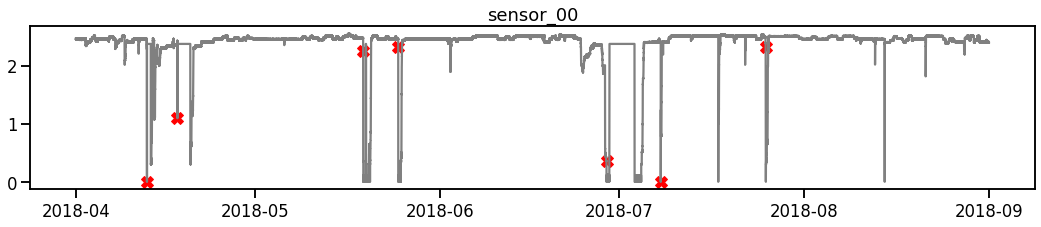

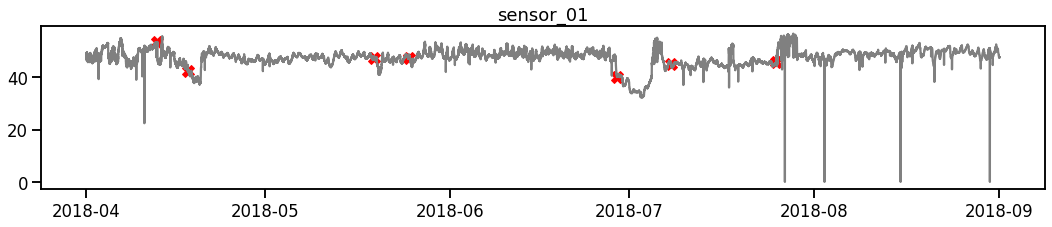

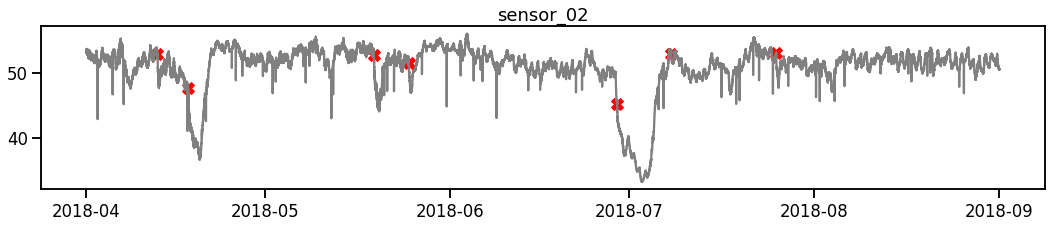

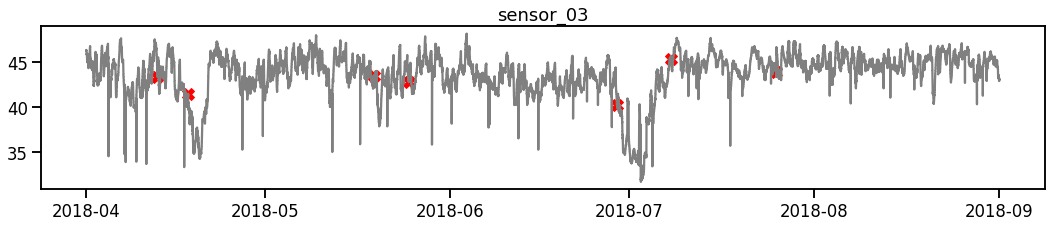

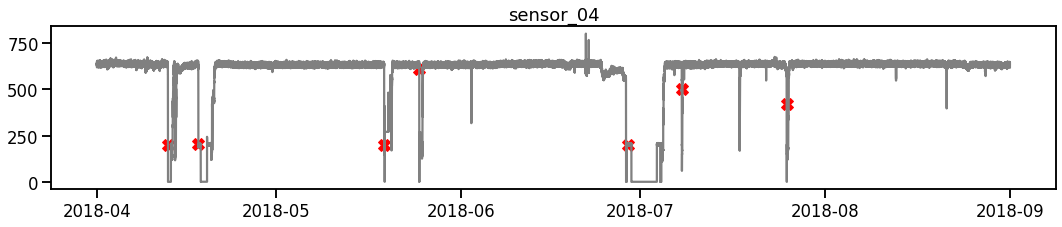

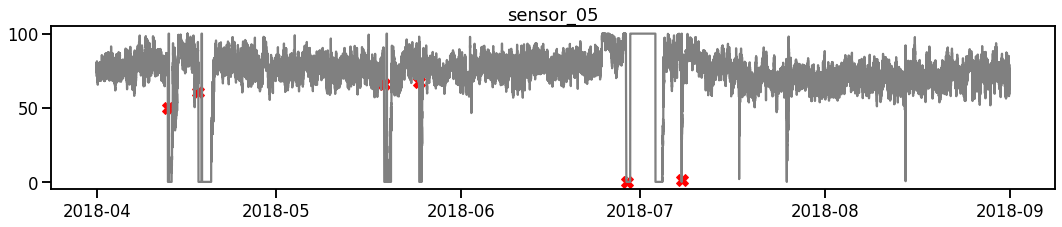

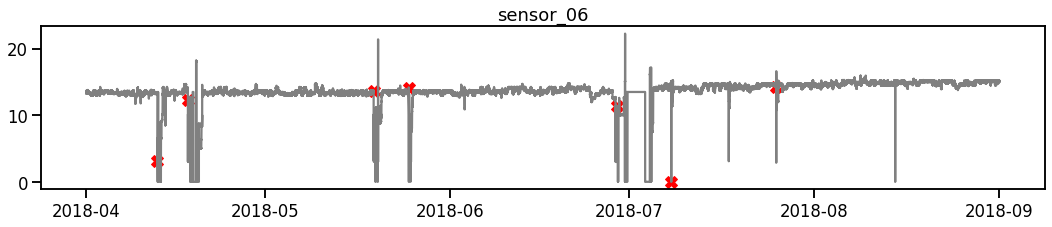

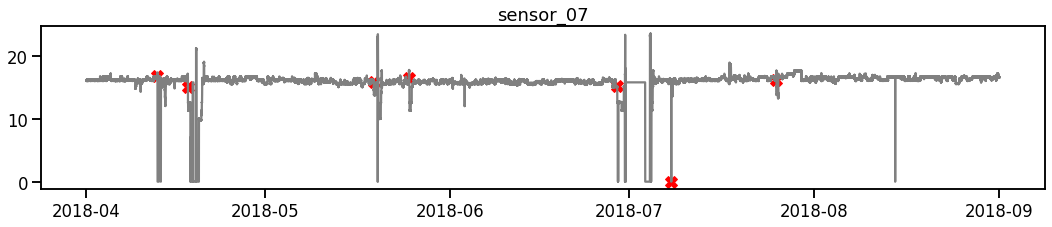

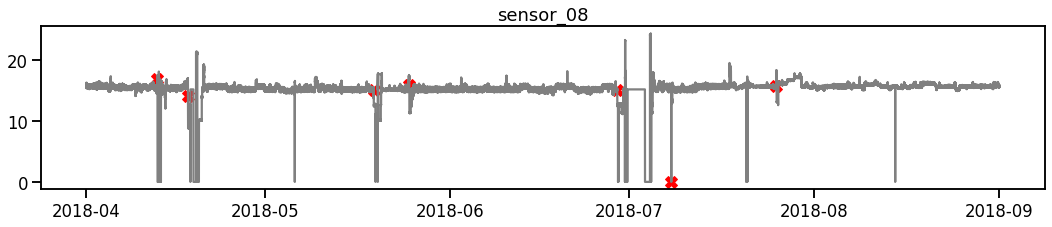

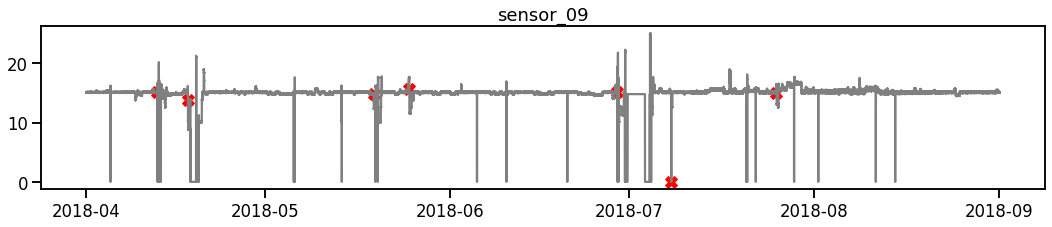

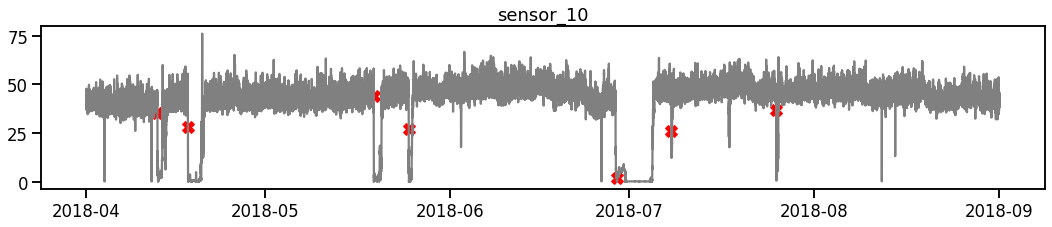

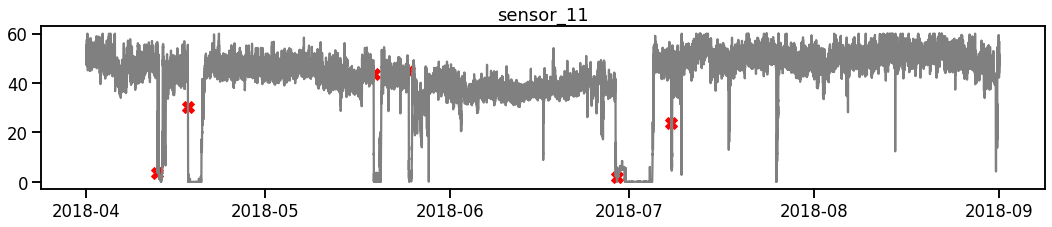

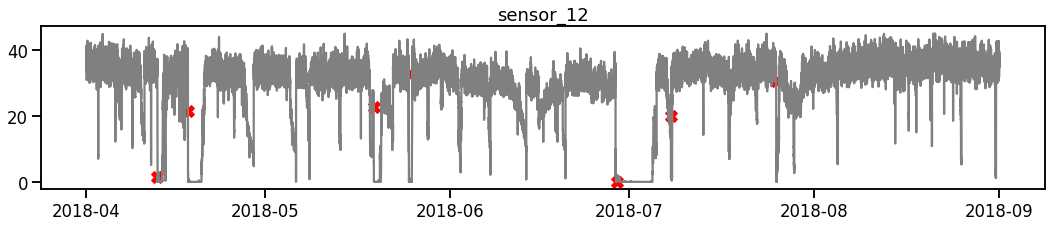

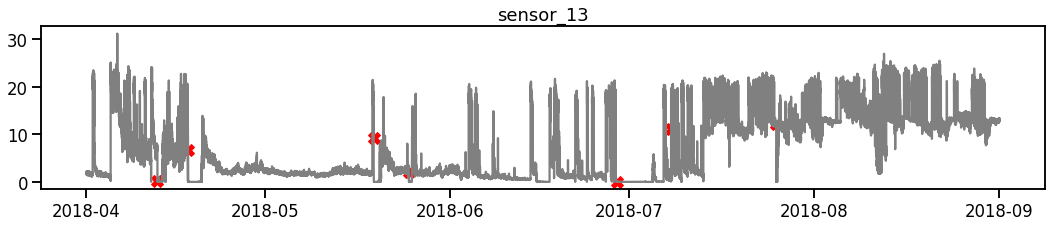

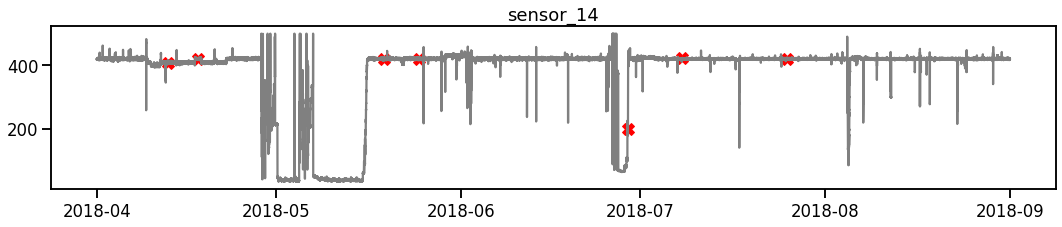

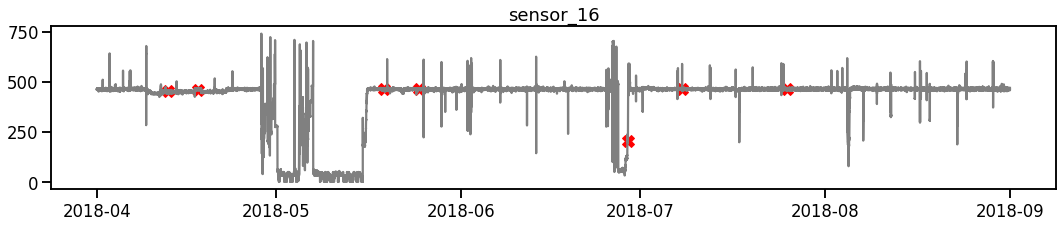

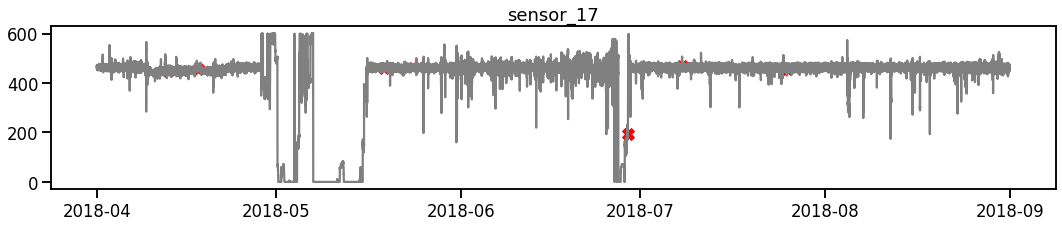

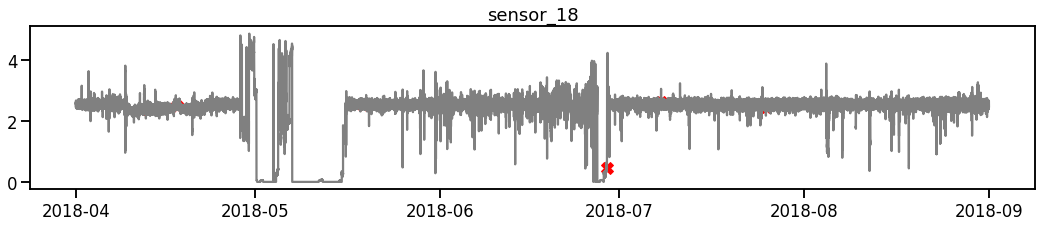

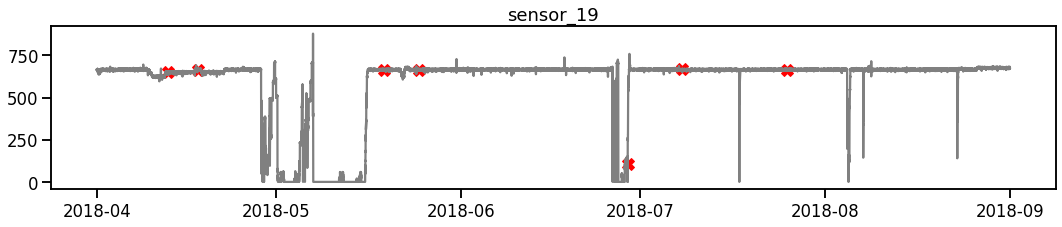

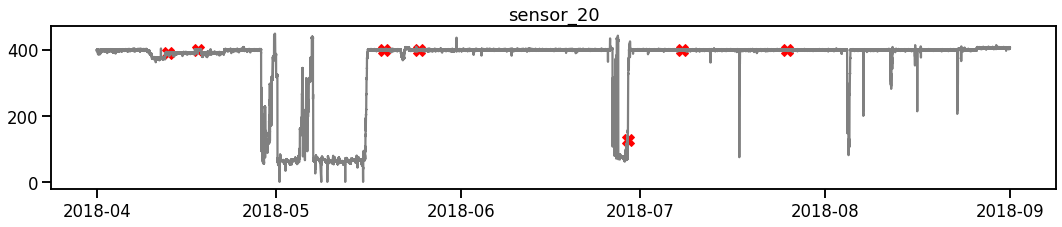

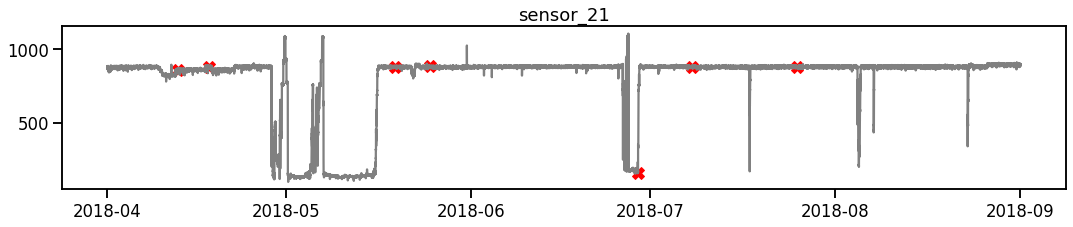

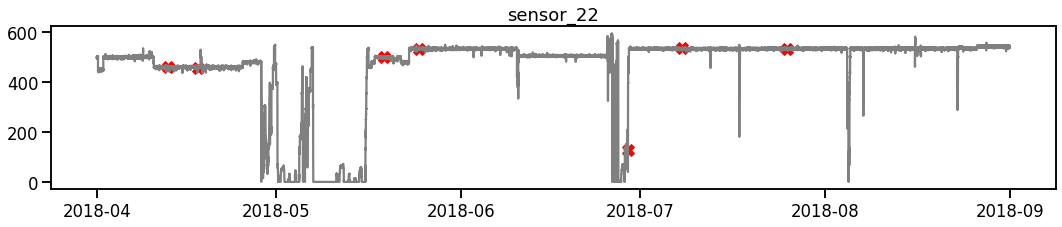

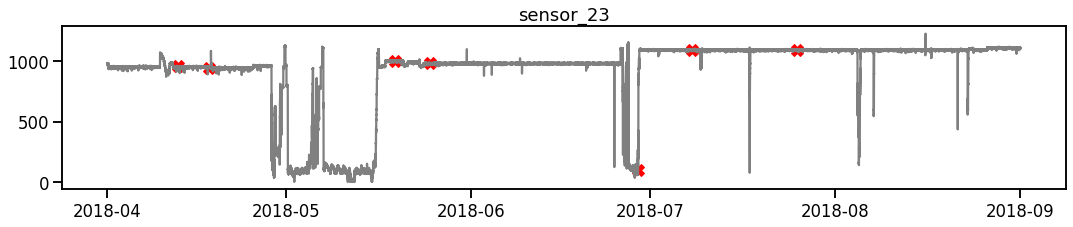

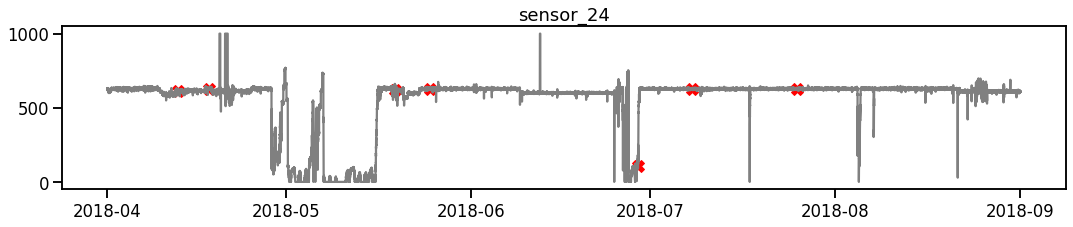

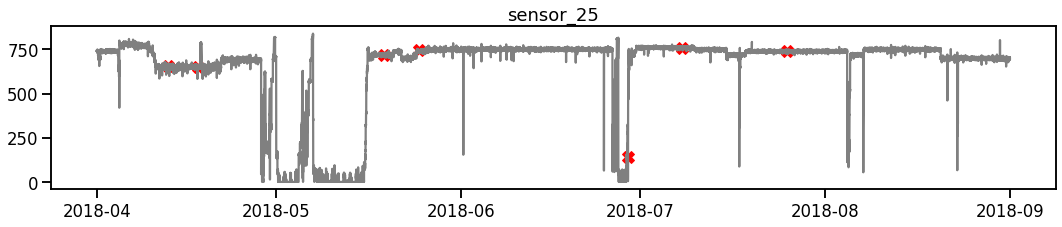

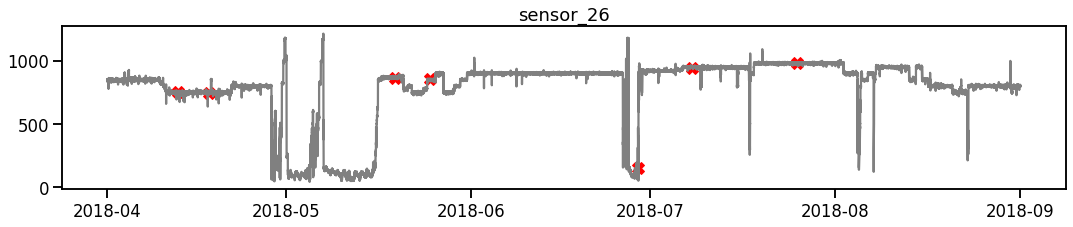

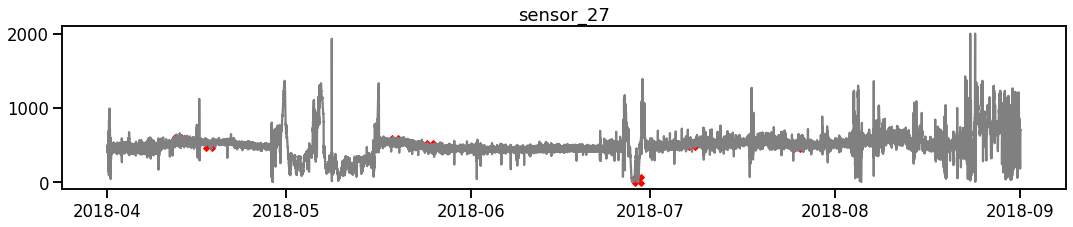

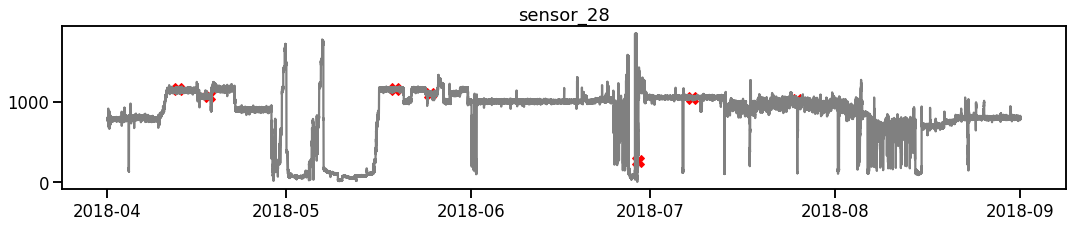

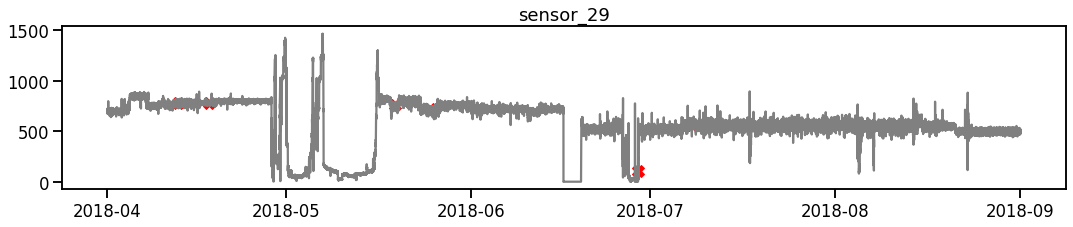

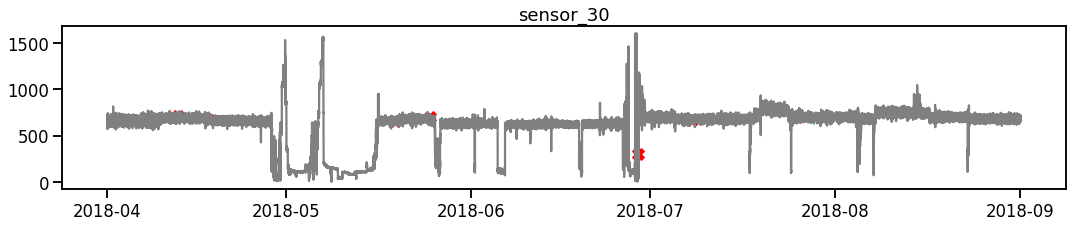

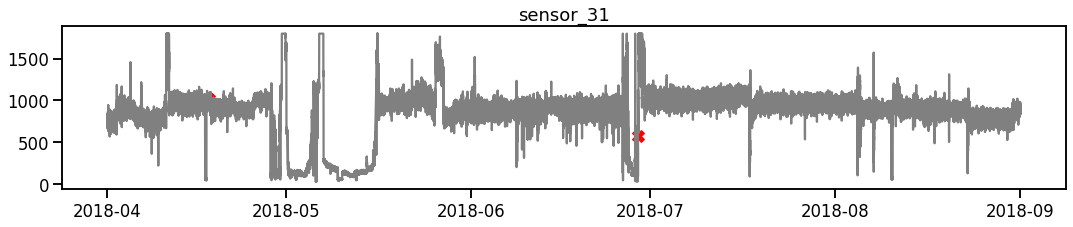

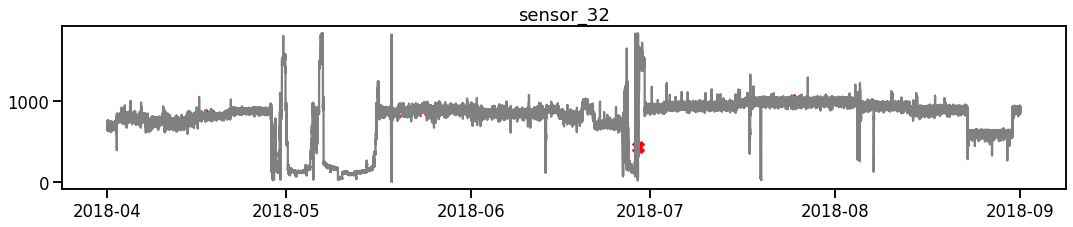

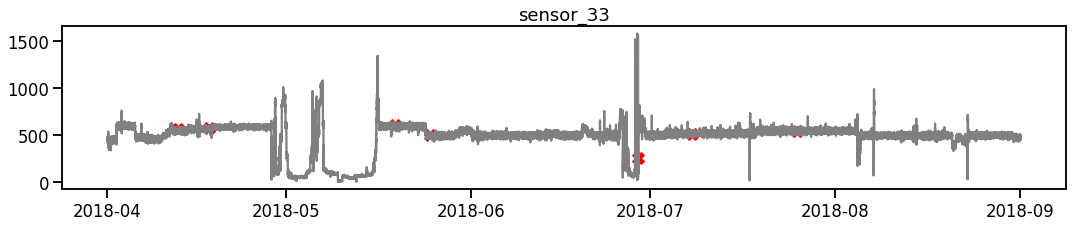

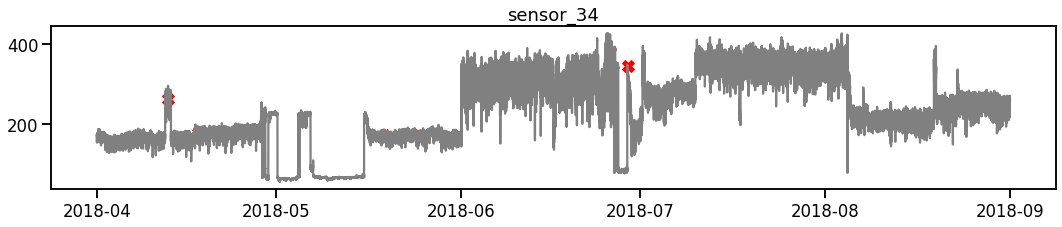

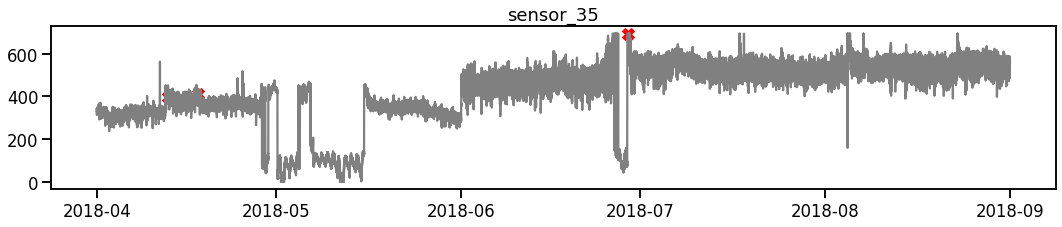

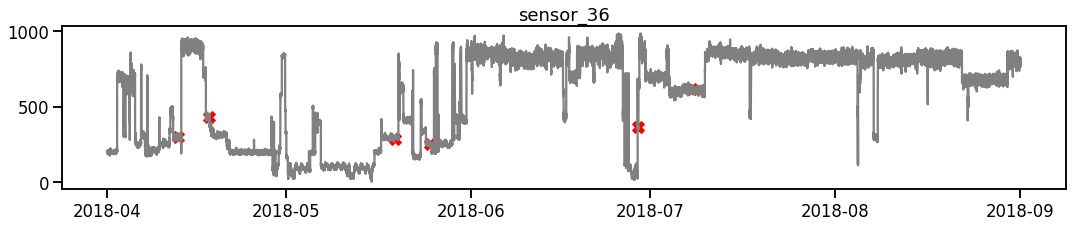

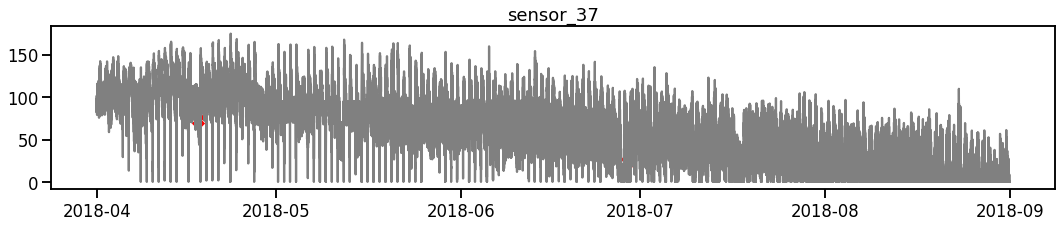

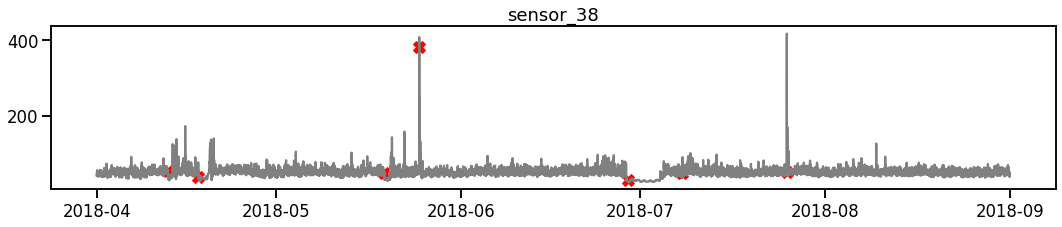

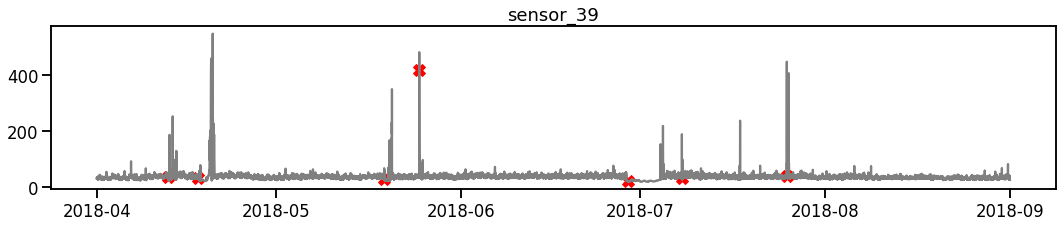

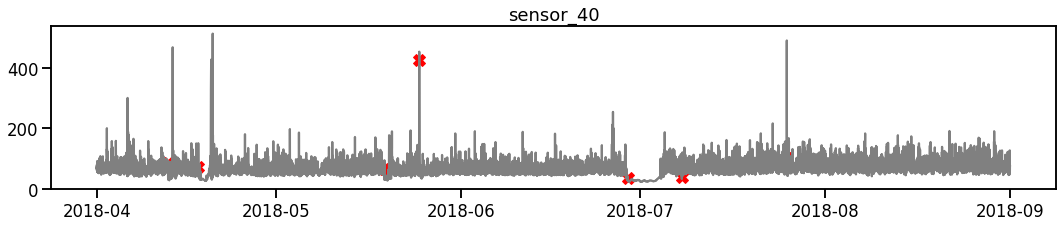

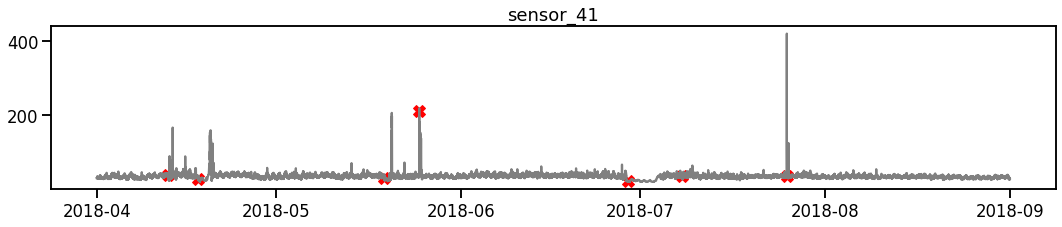

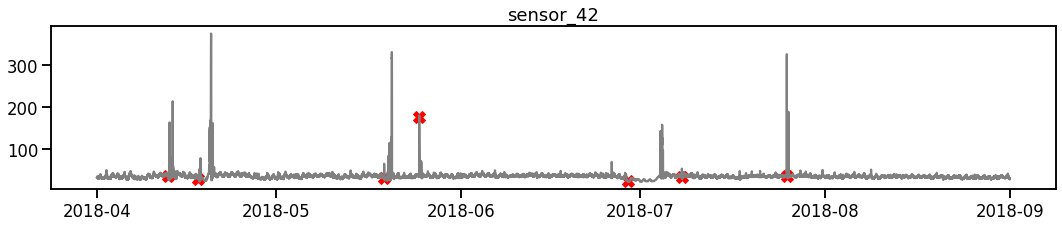

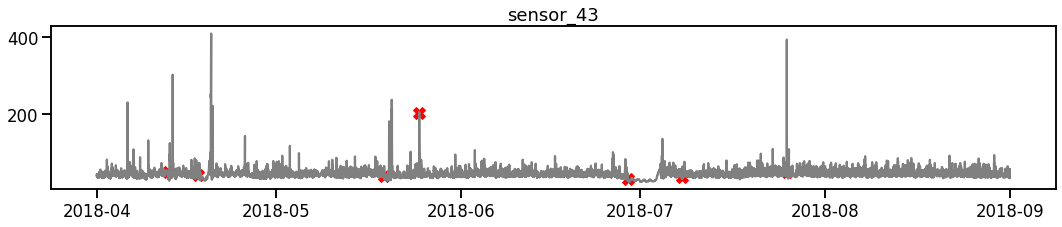

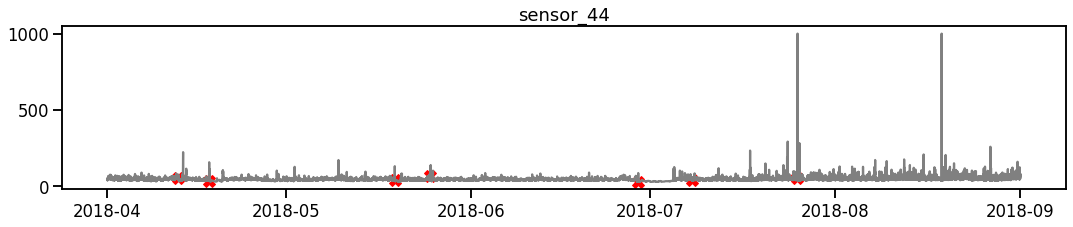

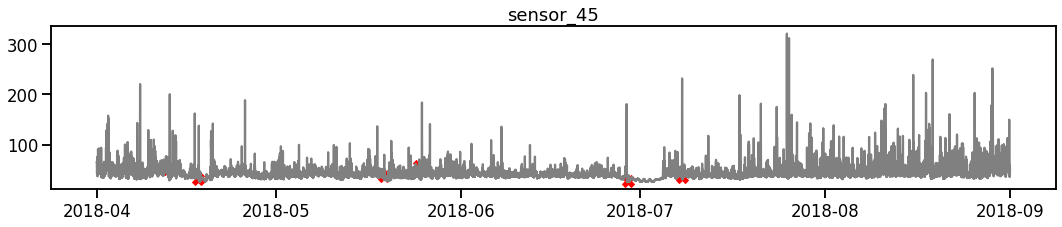

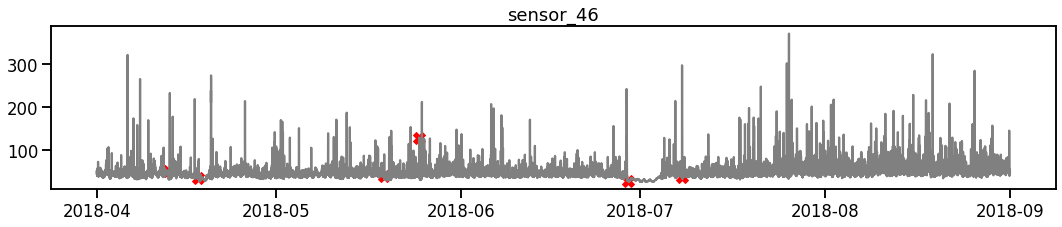

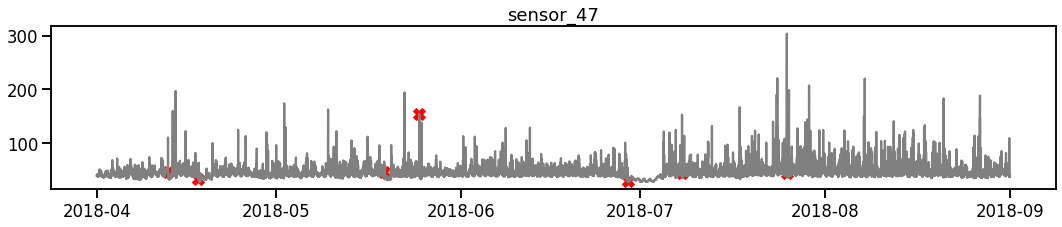

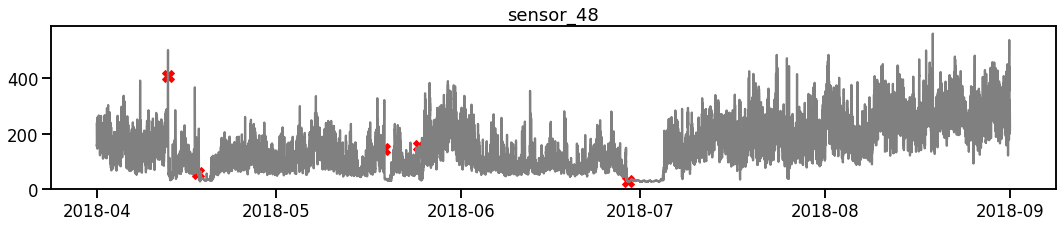

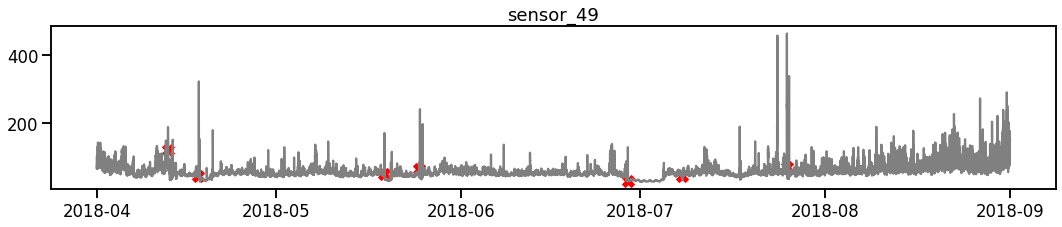

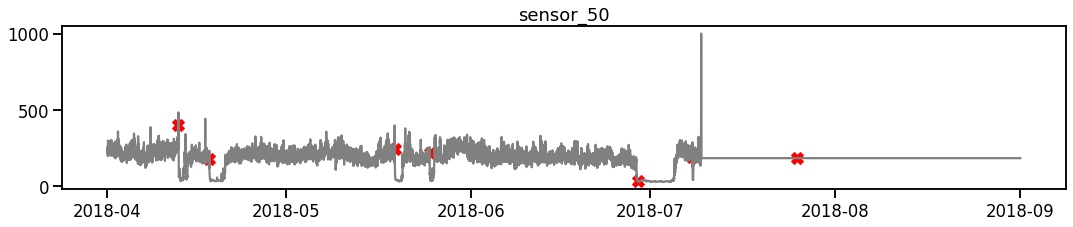

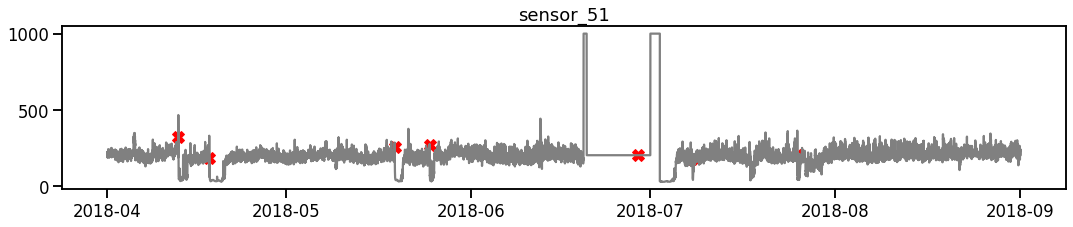

In [37]:
dfBroken = df[df['machine_status']=='BROKEN']
dfSensors = df.drop(['machine_status'], axis=1)
sensorNames=dfSensors.columns
for sensor in sensorNames:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(dfBroken[sensor], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df[sensor], color='grey')
    _ = plt.title(sensor)
    plt.show()

In [38]:
x = df[sensorNames]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

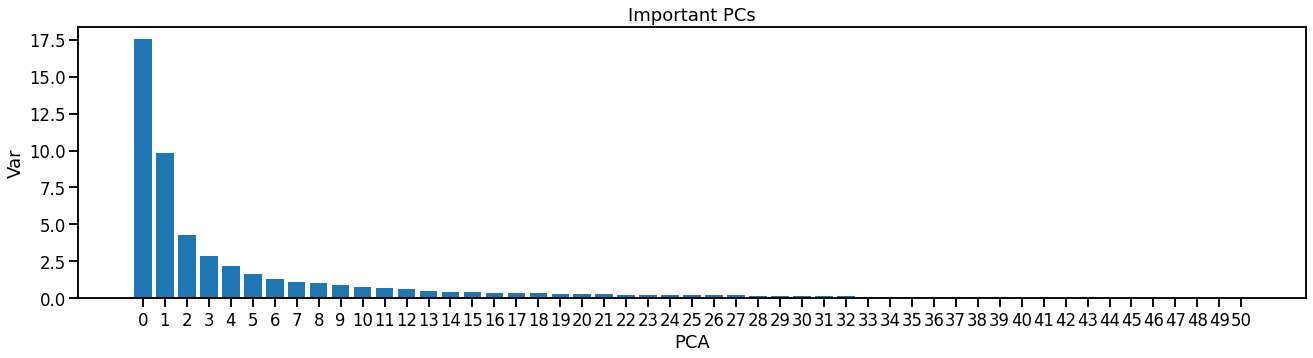

In [39]:
features = range(pca.n_components_)
_ = plt.figure(figsize=(22, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA')
_ = plt.ylabel('Var')
_ = plt.xticks(features)
_ = plt.title("Important PCs")
plt.show()

In [40]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC0', 'PC1','PC2'])

In [41]:
df['PC0']=pd.Series(principalDf['PC0'].values, index=df.index)
df['PC1']=pd.Series(principalDf['PC1'].values, index=df.index)
df['PC2']=pd.Series(principalDf['PC2'].values, index=df.index)

In [42]:
#  for PC0
q1_pc1, q3_pc1 = df['PC0'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)

#PC1
q1_pc2, q3_pc2 = df['PC1'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)
#PC2
q1_pc3, q3_pc3 = df['PC2'].quantile([0.25, 0.75])
iqr_pc3 = q3_pc3 - q1_pc3
lower_pc3 = q1_pc3 - (1.5*iqr_pc3)
upper_pc3 = q3_pc3 + (1.5*iqr_pc3)

In [43]:
print(lower_pc1, upper_pc1)
print(lower_pc2, upper_pc2)
print(lower_pc3, upper_pc3)

-736.3329510286076 222.73590494561944
-738.2364730709822 683.9742726849485
-345.2817782028785 324.5495705771914


In [44]:
df['anomaly_pc1'] = ((df['PC0']>upper_pc1) | (df['PC0']<lower_pc1)).astype('int')
df['anomaly_pc2'] = ((df['PC1']>upper_pc2) | (df['PC1']<lower_pc2)).astype('int')
df['anomaly_pc3'] = ((df['PC2']>upper_pc3) | (df['PC2']<lower_pc3)).astype('int')

In [45]:
print(df['anomaly_pc1'].value_counts())
print(df['anomaly_pc2'].value_counts())
print(df['anomaly_pc3'].value_counts())

0    189644
1     29877
Name: anomaly_pc1, dtype: int64
0    217947
1      1574
Name: anomaly_pc2, dtype: int64
0    203770
1     15751
Name: anomaly_pc3, dtype: int64


In [46]:
outliers_pc1 = df.loc[(df['PC0']>upper_pc1) | (df['PC0']<lower_pc1), 'PC0']
outliers_pc2 = df.loc[(df['PC1']>upper_pc2) | (df['PC1']<lower_pc2), 'PC1']
outliers_pc3 = df.loc[(df['PC2']>upper_pc3) | (df['PC2']<lower_pc3), 'PC2']

In [47]:
print(len(outliers_pc1)/len(df))
print(len(outliers_pc2)/len(df))
print(len(outliers_pc3)/len(df))

0.13610087417604694
0.0071701568414866915
0.0717516775160463


In [48]:
# Apply SelectKBest class to extract the best 3 features - Univariate feature selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
x = df.drop(['machine_status', 'PC0','PC1' ,'PC2', 'anomaly_pc1', 'anomaly_pc2', 'anomaly_pc3'], axis=1)
y = df['machine_status']
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(x_scaled, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(3, 'Score'))

      Feature         Score
11  sensor_11  10106.761967
12  sensor_12   9879.052739
4   sensor_04   8167.176442


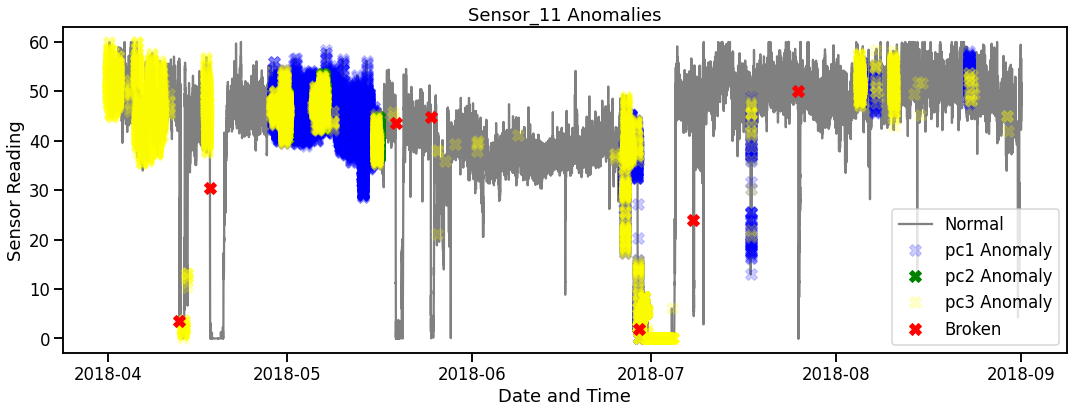

In [49]:
#PC3 ANOMALY on sensor_11 AND WHEN ACTUAL BREAK HAPPENED
a = df[df['anomaly_pc1'] == 1] #anomaly
b = df[df['anomaly_pc2'] == 1]
c = df[df['anomaly_pc3'] == 1]
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_11'], color='grey', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='X', color='blue', markersize=12, label='pc1 Anomaly', alpha = 0.2)
_ = plt.plot(b['sensor_11'], linestyle='none', marker='X', color='green', markersize=12, label='pc2 Anomaly')
_ = plt.plot(c['sensor_11'], linestyle='none', marker='X', color='yellow', markersize=12, label='pc3 Anomaly', alpha=0.2)
_ = plt.plot(dfBroken['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [50]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(principalDf.values)
labels = kmeans.predict(principalDf.values)
unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))

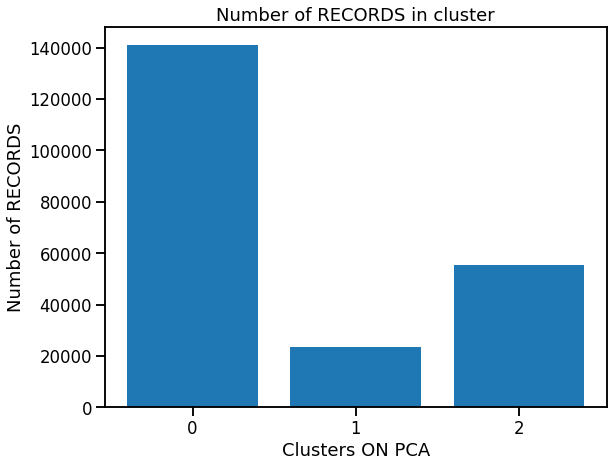

In [51]:
_ = plt.figure(figsize = (9, 7))
_ = plt.bar(clusters[0], clusters[1], tick_label=clusters[0])
_ = plt.xlabel('Clusters ON PCA')
_ = plt.ylabel('Number of RECORDS')
_ = plt.title('Number of RECORDS in cluster')
plt.show()

In [52]:
principalDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219521 entries, 0 to 219520
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PC0     219521 non-null  float64
 1   PC1     219521 non-null  float64
 2   PC2     219521 non-null  float64
dtypes: float64(3)
memory usage: 5.0 MB


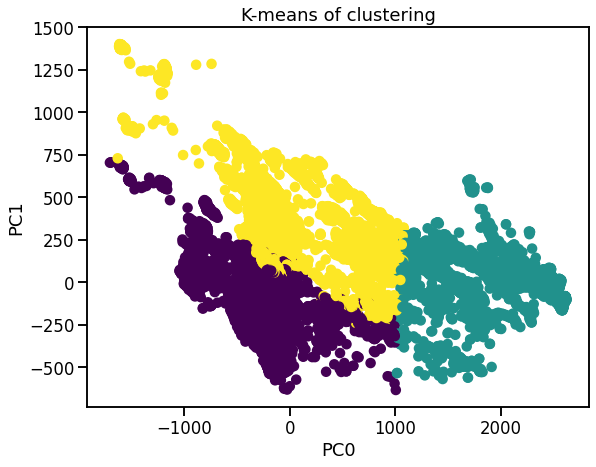

In [53]:
_ = plt.figure(figsize=(9,7))
_ = plt.scatter(principalDf['PC0'], principalDf['PC1'], c=labels)
_ = plt.xlabel('PC0')
_ = plt.ylabel('PC1')
_ = plt.title('K-means of clustering')
plt.show()

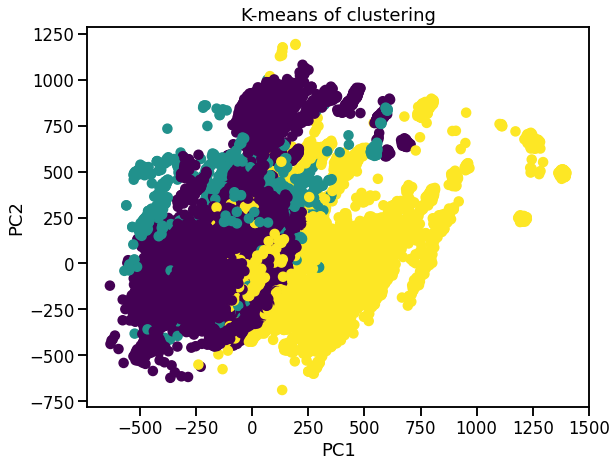

In [54]:
_ = plt.figure(figsize=(9,7))
_ = plt.scatter(principalDf['PC1'], principalDf['PC2'], c=labels)
_ = plt.xlabel('PC1')
_ = plt.ylabel('PC2')
_ = plt.title('K-means of clustering')
plt.show()

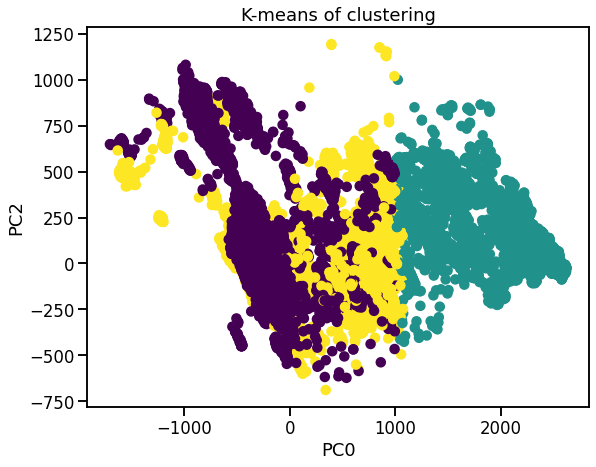

In [55]:
_ = plt.figure(figsize=(9,7))
_ = plt.scatter(principalDf['PC0'], principalDf['PC2'], c=labels)
_ = plt.xlabel('PC0')
_ = plt.ylabel('PC2')
_ = plt.title('K-means of clustering')
plt.show()

In [57]:
from mpl_toolkits import mplot3d

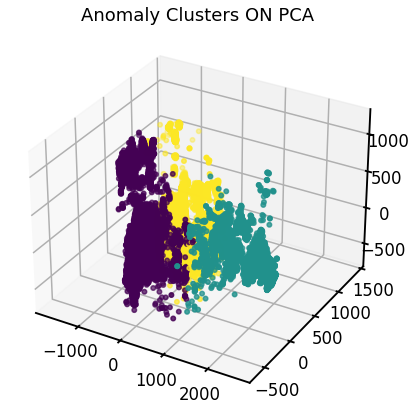

In [56]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(principalDf['PC0'], principalDf['PC1'], principalDf['PC2'], c=labels)
plt.title("Anomaly Clusters ON PCA")
 
# show plot
plt.show()

In [58]:
def getDistanceByPoint(data, model):
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

In [59]:
distance = getDistanceByPoint(principalDf, kmeans)

In [60]:
outliers_fraction = 0.11
number_of_outliers = int(outliers_fraction*len(distance))

In [61]:
threshold = distance.nlargest(number_of_outliers).min()

In [62]:
#(0:normal, 1:anomaly) 
principalDf['anomalyDist'] = (distance >= threshold).astype(int)

In [63]:
principalDf['anomalyDist'].value_counts()

0    195374
1     24147
Name: anomalyDist, dtype: int64

In [64]:
df['anomalyDist'] = pd.Series(principalDf['anomalyDist'].values, index=df.index)

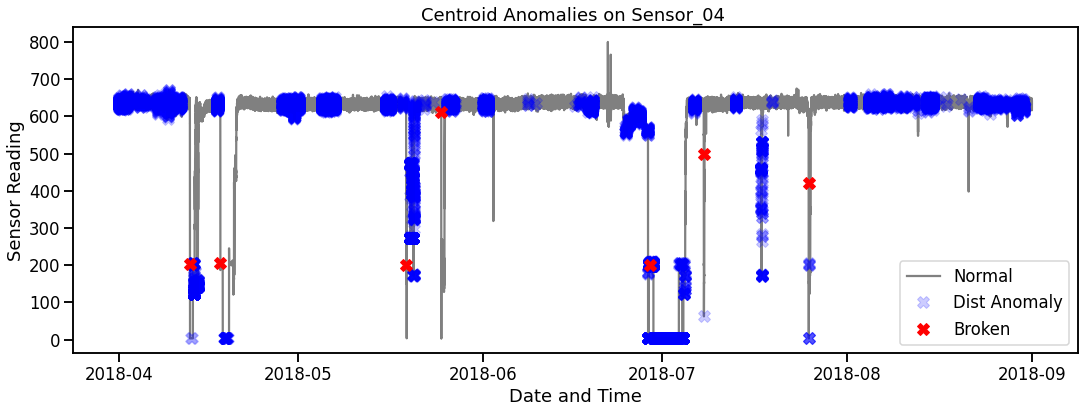

In [65]:
a = df[df['anomalyDist'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_04'], color='grey', label='Normal')
_ = plt.plot(a['sensor_04'], linestyle='none', marker='X', color='blue', markersize=12, label='Dist Anomaly', alpha= 0.2)
_ = plt.plot(dfBroken['sensor_04'], linestyle='none', marker='X', color='red', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Centroid Anomalies on Sensor_04 ')
_ = plt.legend(loc='best')
plt.show();

In [66]:
df[df['anomalyDist']==1]['machine_status'].value_counts()

NORMAL        20635
RECOVERING     3511
BROKEN            1
Name: machine_status, dtype: int64

In [67]:
df['machine_status'].value_counts()

NORMAL        205067
RECOVERING     14447
BROKEN             7
Name: machine_status, dtype: int64